# TITANIC SURVIVAL PREDICTION

**Objectives** :

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank
after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board,
resulting in the death of 1502 out of 2224 passengers and crew.
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or
not. This is a classic beginner project with readily available data.
The dataset typically used for this project contains information about individual passengers, such as
their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
% matplotlib in line

UsageError: Line magic function `%` not found.


In [3]:
titanic= pd.read_csv(r"C:\Users\bswal\OneDrive\Attachments\Titanic-Dataset.csv")
titanic.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

# Analysing Data

<Axes: xlabel='Survived', ylabel='count'>

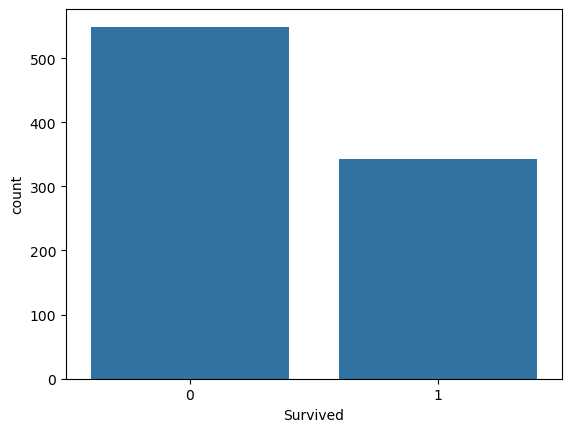

In [6]:
sns.countplot(x='Survived',data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

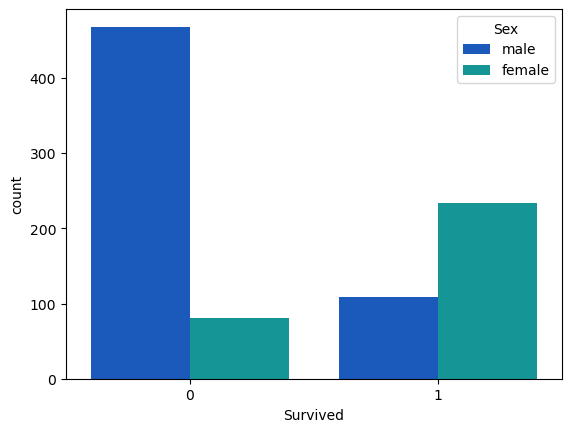

In [7]:
sns.countplot(x="Survived", hue="Sex", data=titanic,palette="winter")

<Axes: xlabel='Survived', ylabel='count'>

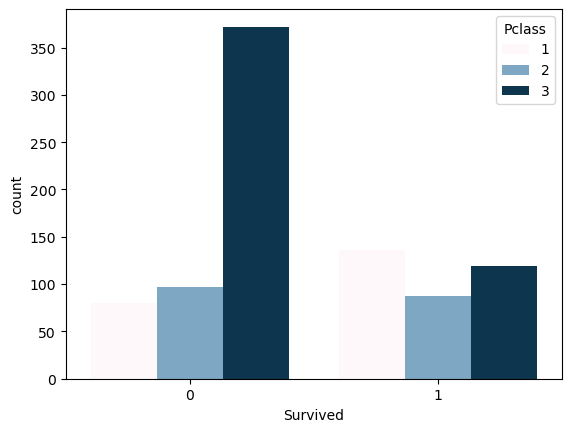

In [8]:
sns.countplot(x='Survived', hue='Pclass',data=titanic, palette='PuBu')

<Axes: ylabel='Frequency'>

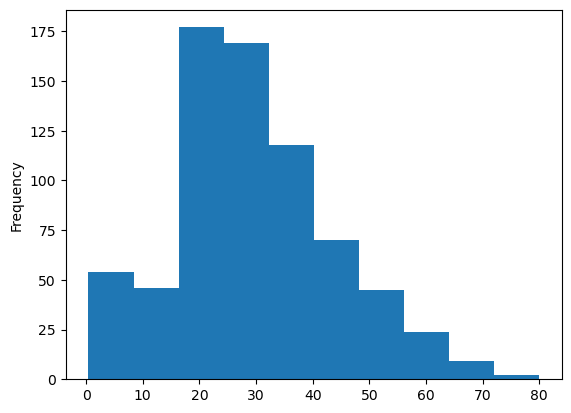

In [9]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

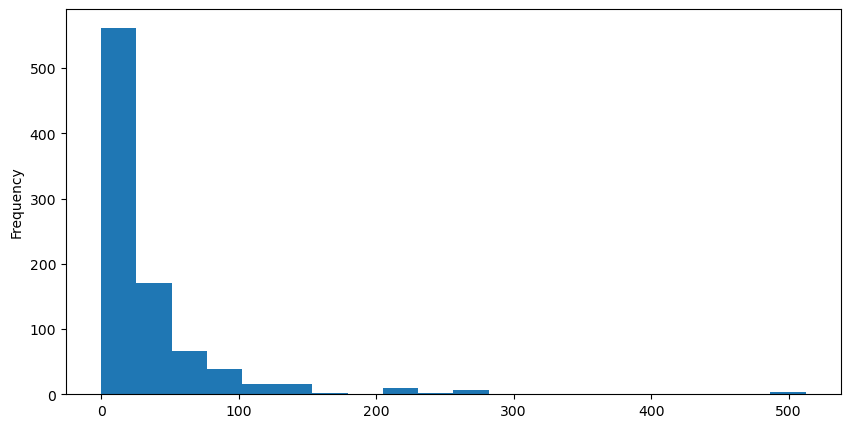

In [10]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))
# We can observe that most of the tickets bought are under fare 100 and very few are on the higher side of (220-500 range) 

C:\Users\bswal\AppData\Local\Temp\ipykernel_5360\2905124696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=titanic, palette='rocket')


<Axes: xlabel='SibSp', ylabel='count'>

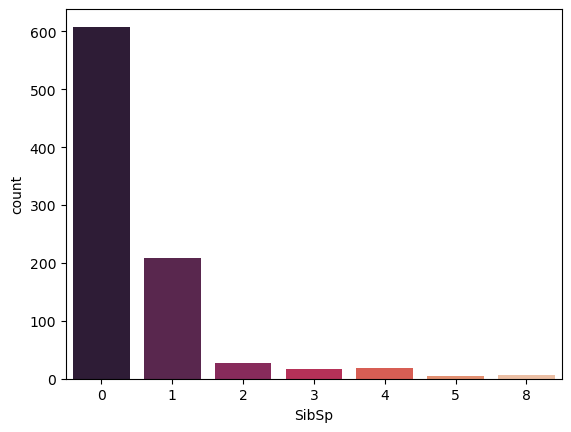

In [11]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

<Axes: ylabel='Frequency'>

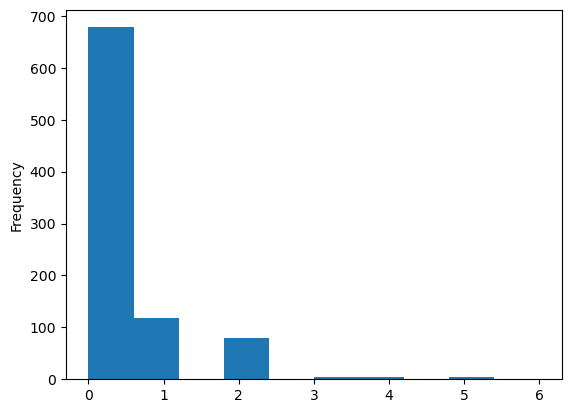

In [12]:
titanic['Parch'].plot.hist()

# Data Wrangling

In [ ]:
#Data wrangling means cleaning the data , removing the null values,droping unwanted columns, adding new ones if needed.

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

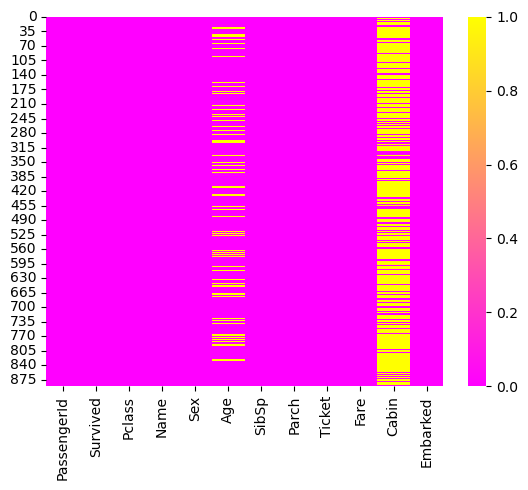

In [14]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

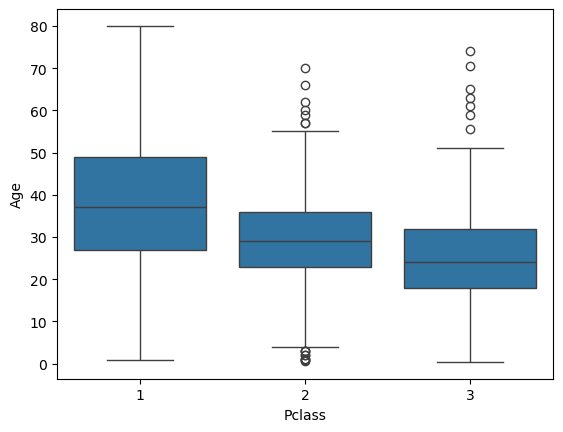

In [15]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [ ]:
#we can observe that older agegroup are travelling more in (class 1 and 2) compared to (class 3)
#hue parameter determines color

In [16]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


<Axes: >

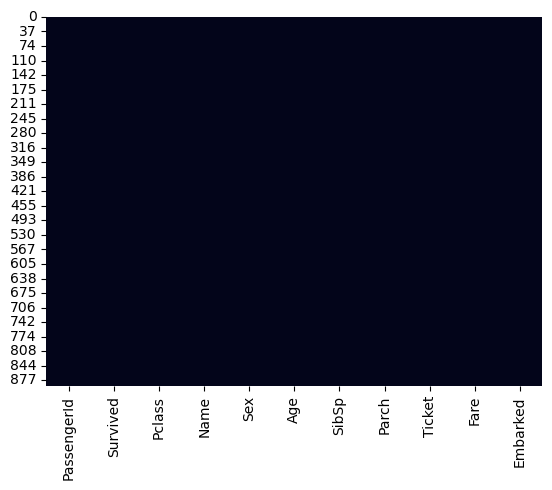

In [17]:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(),cbar=False)

In [ ]:
#we do not have any null values

In [ ]:
#we convert the few columns (strings) into categorial data to apply logistics regression

In [18]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [19]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)  #drop female
sex.head(3)

,male
0,True
1,False
2,False


In [20]:
embark=pd.get_dummies(titanic['Embarked'])
embark.head(3)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True


In [21]:
pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head(3)

,2,3
0,False,True
1,False,False
2,False,True


In [22]:
titanic=pd.concat([titanic,sex,embark,pcl],axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,True,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,False,True,False,True


In [23]:
titanic.drop(['Name','PassengerId','Pclass',"Ticket",'Sex','Embarked'], axis=1, inplace=True)
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,False,True,False,True
1,1,38.0,1,0,71.2833,False,True,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,False,True,False,True


# Train Data

In [24]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2, random_state=7)

# Logistics Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [27]:
X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)
lm.fit(X_train,y_train)

C:\Users\bswal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lm.score(X_train,y_train)

0.8154657293497364

In [29]:
lm.score(X_valid,y_valid)

0.7902097902097902